In [3]:
# Load the required libraries

import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm 

In [4]:
# Load the data 

sales = pd.read_csv('Product Sales Data.csv')

In [5]:
sales.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,New Brunswick,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Jersey City,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,New Brunswick,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,New Brunswick,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,New Brunswick,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [6]:
# Branch vs gross income
# Brach -> product vs gross income/rating
# 高峰期
# Customer type vs gross income

# features selection -- random forests
# gender vs gross income --> logistic regression?

In [7]:
x = sales[['Customer type', 'Gender', 'Product line']]
y = sales['gross income']
x = pd.get_dummies(x, drop_first=True)
x.head()

,Customer type_Normal,Gender_Male,Product line_Fashion accessories,Product line_Food and beverages,Product line_Health and beauty,Product line_Home and lifestyle,Product line_Sports and travel
0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0
2,1,1,0,0,0,1,0
3,0,1,0,0,1,0,0
4,1,1,0,0,0,0,1


In [8]:
# Features selection
# Building Random Forest model
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae

model = RandomForestRegressor(random_state=1)
model.fit(x, y)
pred = model.predict(x)
feat_importances = pd.Series(model.feature_importances_, index=x.columns)

In [9]:
feat_importances

Customer type_Normal                0.195990
Gender_Male                         0.265582
Product line_Fashion accessories    0.083169
Product line_Food and beverages     0.105899
Product line_Health and beauty      0.148231
Product line_Home and lifestyle     0.119416
Product line_Sports and travel      0.081713
dtype: float64

In [10]:
product_line = sum(feat_importances[2:])

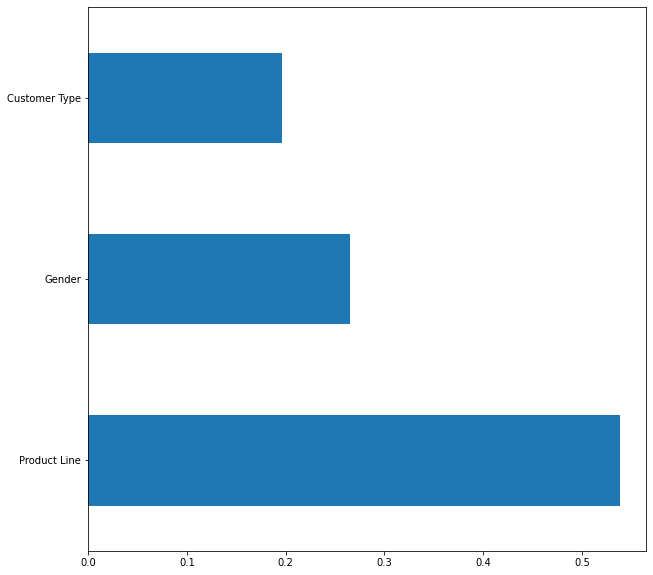

In [11]:
# Visualizing Feature Importance
features ={'Product Line': product_line, 'Gender': feat_importances[1], 'Customer Type': feat_importances[0]}
features_select = pd.Series(data=features, index=['Product Line', 'Gender', 'Customer Type'])
features_select.nlargest(3).plot(kind='barh',figsize=(10,10));

In [12]:
mdl = sm.OLS(y, x).fit()
print(mdl.summary())

                                 OLS Regression Results                                
Dep. Variable:           gross income   R-squared (uncentered):                   0.549
Model:                            OLS   Adj. R-squared (uncentered):              0.546
Method:                 Least Squares   F-statistic:                              172.7
Date:                Thu, 08 Jul 2021   Prob (F-statistic):                   6.70e-167
Time:                        21:17:04   Log-Likelihood:                         -3982.1
No. Observations:                1000   AIC:                                      7978.
Df Residuals:                     993   BIC:                                      8013.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
                                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------